## Assignment 5: Dataset Exploration & Preprocessing
### Dataset was taken from this research: [Multistep Prediction of Bus Arrival Time with the Recurrent Neural Network (clickable)](https://doi.org/10.1155/2021/6636367)
### Here is the link to [github (clickable)](https://github.com/ricebow/multi-step-RNN)

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset_path = "line_30.csv"
df = pd.read_csv(dataset_path)

target_dataset_path = "line_30_y.csv"
df_y = pd.read_csv(target_dataset_path)

In [20]:
# Display first few rows
display(df.head())
display(df_y.head())

,30,1,778,88,8,18,6,0,0.1,0.2,...,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33
0,30,1,778,88,8,18,6,0,600,0,...,0,0,0,0,0,0,0,0,0,0
1,30,1,778,88,8,18,6,0,1200,0,...,0,0,0,0,0,0,0,0,0,0
2,30,1,778,88,8,18,6,0,1700,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1,778,88,8,18,6,0,2300,0,...,0,0,0,0,0,0,0,0,0,0
4,30,1,778,88,8,18,6,0,2900,0,...,0,0,0,0,0,0,0,0,0,0


,0,35,49,108,43,34,22,68,64,43.1,...,134,256,191,97,95,86,168,119,128,115
0,-35,0,49,108,43,34,22,68,64,43,...,134,256,191,97,95,86,168,119,128,115
1,-35,-49,0,108,43,34,22,68,64,43,...,134,256,191,97,95,86,168,119,128,115
2,-35,-49,-108,0,43,34,22,68,64,43,...,134,256,191,97,95,86,168,119,128,115
3,-35,-49,-108,-43,0,34,22,68,64,43,...,134,256,191,97,95,86,168,119,128,115
4,-35,-49,-108,-43,-34,0,22,68,64,43,...,134,256,191,97,95,86,168,119,128,115


### Dataset Overview

In [21]:
# Check basic information about the dataset
df.info()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122335 entries, 0 to 122334
Data columns (total 41 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   30      122335 non-null  int64
 1   1       122335 non-null  int64
 2   778     122335 non-null  int64
 3   88      122335 non-null  int64
 4   8       122335 non-null  int64
 5   18      122335 non-null  int64
 6   6       122335 non-null  int64
 7   0       122335 non-null  int64
 8   0.1     122335 non-null  int64
 9   0.2     122335 non-null  int64
 10  0.3     122335 non-null  int64
 11  0.4     122335 non-null  int64
 12  0.5     122335 non-null  int64
 13  0.6     122335 non-null  int64
 14  0.7     122335 non-null  int64
 15  0.8     122335 non-null  int64
 16  0.9     122335 non-null  int64
 17  0.10    122335 non-null  int64
 18  0.11    122335 non-null  int64
 19  0.12    122335 non-null  int64
 20  0.13    122335 non-null  int64
 21  0.14    122335 non-null  int64
 22  0.15    122335 non-n

In [22]:
# Summary statistics
display(df.describe())
display(df_y.describe())

,30,1,778,88,8,18,6,0,0.1,0.2,...,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33
count,122335.0,122335.0,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.0,...,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000
mean,30.0,1.0,3846.507426,1349.103168,11.955565,28.833204,2.966494,0.103323,8990.698492,0.0,...,21.248457,29.617419,32.696448,53.858201,27.834438,16.509870,25.741971,11.008223,5.589799,4.420893
std,0.0,0.0,4550.921830,1229.697792,3.842058,17.584081,2.048438,0.304381,5354.265361,0.0,...,34.060116,51.517423,61.558486,108.895687,61.488291,43.486918,76.372796,37.017305,22.576146,26.036550
min,30.0,1.0,736.000000,87.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.0,1.0,809.000000,97.000000,9.000000,14.000000,1.000000,0.000000,4600.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.0,1.0,882.000000,778.000000,12.000000,30.000000,3.000000,0.000000,9300.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.0,1.0,10726.000000,2544.000000,15.000000,42.000000,5.000000,0.000000,13600.000000,0.0,...,48.000000,74.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.0,1.0,10815.000000,3195.000000,20.000000,59.000000,6.000000,1.000000,18000.000000,0.0,...,290.000000,525.000000,594.000000,600.000000,567.000000,587.000000,577.000000,330.000000,244.000000,522.000000


,0,35,49,108,43,34,22,68,64,43.1,...,134,256,191,97,95,86,168,119,128,115
count,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,...,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000,122335.000000
mean,-50.939232,-57.421539,-100.834945,-40.307614,-49.200662,-11.949172,-47.903290,-41.010692,-36.287244,-25.543851,...,42.991417,44.229051,164.514718,104.105236,63.410553,169.184869,100.821654,79.425111,137.046651,120.281498
std,36.263377,30.860997,56.341077,54.544689,50.255028,38.747300,46.929447,61.847721,71.242594,70.084649,...,109.701317,165.462323,173.783414,105.197135,118.988991,135.409960,69.232094,50.028571,53.280076,23.032358
min,-300.000000,-568.000000,-566.000000,-240.000000,-248.000000,-245.000000,-325.000000,-298.000000,-357.000000,-341.000000,...,-594.000000,-600.000000,-567.000000,-587.000000,-577.000000,-330.000000,-244.000000,-522.000000,0.000000,73.000000
25%,-52.000000,-67.000000,-137.000000,-59.000000,-82.000000,-25.000000,-81.000000,-76.000000,-82.000000,-66.000000,...,-25.500000,25.500000,173.000000,98.000000,69.000000,100.000000,66.000000,72.000000,103.000000,110.000000
50%,-43.000000,-57.000000,-109.000000,-52.000000,-49.000000,-21.000000,-48.000000,-69.000000,-55.000000,-52.000000,...,86.000000,105.000000,205.000000,128.000000,81.000000,176.000000,84.000000,87.000000,129.000000,116.000000
75%,-37.000000,-50.000000,-82.000000,-47.000000,-39.000000,-18.000000,-34.000000,-55.000000,0.000000,45.000000,...,106.000000,140.000000,244.000000,158.000000,114.000000,243.000000,160.000000,115.000000,171.000000,124.000000
max,0.000000,300.000000,568.000000,566.000000,240.000000,248.000000,245.000000,325.000000,298.000000,357.000000,...,525.000000,594.000000,600.000000,567.000000,587.000000,577.000000,330.000000,244.000000,522.000000,469.000000


### Bus Arrival Time Visualization

In [23]:
df_y = pd.read_csv(target_dataset_path)

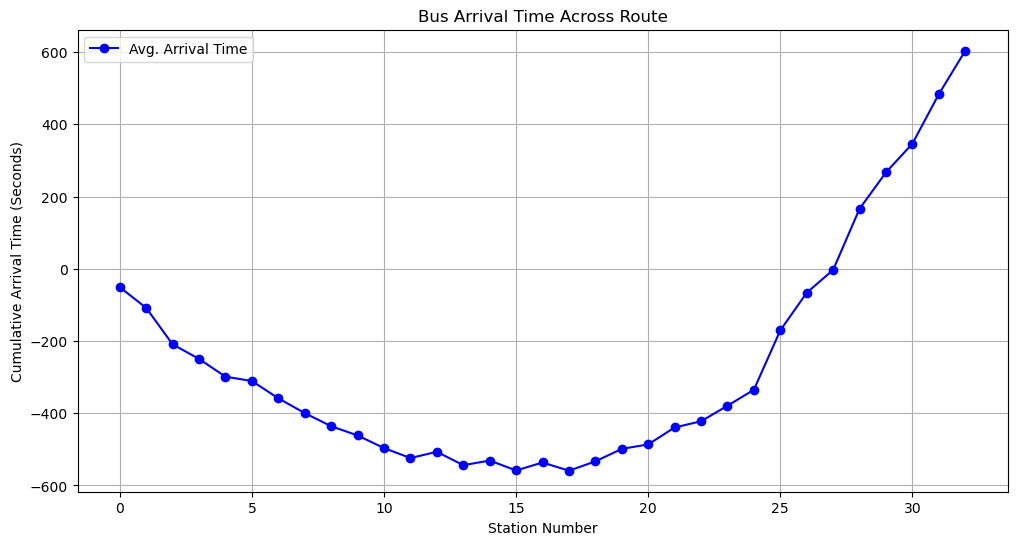

In [24]:
# Extract station numbers (assuming arrival differences correspond to stations)
station_numbers = list(range(len(df_y.columns)))

# Compute cumulative arrival times for visualization
cumulative_arrival_times = df_y.cumsum(axis=1).mean(axis=0)

# Plot arrival times across stations
plt.figure(figsize=(12, 6))
plt.plot(station_numbers, cumulative_arrival_times, marker='o', linestyle='-', color='b', label="Avg. Arrival Time")
plt.xlabel("Station Number")
plt.ylabel("Cumulative Arrival Time (Seconds)")
plt.title("Bus Arrival Time Across Route")
plt.grid(True)
plt.legend()
plt.show()

### Handling Missing Values

In [25]:
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])  # Show only columns with missing values

Series([], dtype: int64)

In [26]:
# Fill missing values (example: mean for numerical, mode for categorical)
df.fillna(df.mean(), inplace=True)  # Example for numerical columns

In [27]:
# Encoding categorical variables (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [28]:
# Display the processed dataframe
display(df.head())

,30,1,778,88,8,18,6,0,0.1,0.2,...,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33
0,30,1,778,88,8,18,6,0,600,0,...,0,0,0,0,0,0,0,0,0,0
1,30,1,778,88,8,18,6,0,1200,0,...,0,0,0,0,0,0,0,0,0,0
2,30,1,778,88,8,18,6,0,1700,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1,778,88,8,18,6,0,2300,0,...,0,0,0,0,0,0,0,0,0,0
4,30,1,778,88,8,18,6,0,2900,0,...,0,0,0,0,0,0,0,0,0,0


## Conclusion
### - Initial data exploration was performed.
### - Data cleaning and preprocessing were done.
### - The dataset is now ready for further analysis or modeling.

In [30]:
# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

df_y.to_csv("cleaned_target_dataset.csv", index=False)

print("Data Preprocessing Complete. Cleaned dataset saved as 'cleaned_dataset.csv'")

Data Preprocessing Complete. Cleaned dataset saved as 'cleaned_dataset.csv'
